# Classification

## Classify sales
The idea is to classify the sales according to the ranges in sales variable. Identifying as lost, low, medium and high sales. 

Load the cleaned data.

In [1]:
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv", encoding="ISO-8859-1")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,0


In [3]:
df_aux = df.copy()
df_aux['sales'] = df_aux['Quantity']*df_aux['UnitPrice']
df_aux['sales_level'] = pd.cut(df_aux['sales'], 
                               bins=[df_aux['sales'].min()-1,
                                     0,df_aux['sales'].mean()/2,
                                     df_aux['sales'].mean(),
                                     df_aux['sales'].max()], 
                               labels=[1,2,3, 4])

In [4]:
#transform country column
df_aux['Country'] = df_aux['Country'].astype('category').cat.codes.astype('int32')
df_aux['StockCode'] = df_aux['StockCode'].astype('category').cat.codes.astype('int32')
df_aux['InvoiceNo'] = df_aux['InvoiceNo'].astype('category').cat.codes.astype('int32')

In [5]:
df_aux.drop(['sales', 'UnitPrice', 'Description', 'InvoiceDate'], axis=1, inplace=True)

In [6]:
#split the dataframe: X - predictors and y - target
X = df_aux.drop('sales_level', axis=1)
y = df_aux['sales_level']

#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=202)
clf.fit(X_train, y_train)
print('Score:',clf.score(X_test, y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

Score: 0.8960868175896566


,Actual,Predicted
281364,2,2
39640,2,2
268691,4,4
117730,2,2
357782,2,2


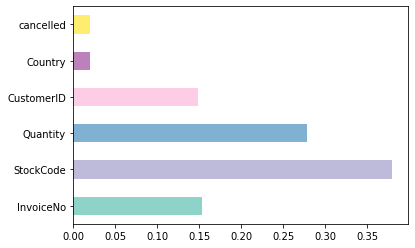

In [8]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
fig, ax = plt.subplots(1,1)
colors = cm.get_cmap('Set3', feat_importances.shape[0]).colors
feat_importances.plot(kind='barh', ax=ax, color=colors)
plt.show()